In [21]:
from neuralnetwork.optimizers.genetic_algorithm import Optimizer
import math
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [22]:
def generate_drivers(nn_param_choices, config):
    optimizer = Optimizer(nn_param_choices, config=config)
    # these are the driver networks
    networks = optimizer.create_population(config['num_drivers'], config['network_topology_by_layer'],
                                           random_topology=config['random_topology'])
    return networks

In [23]:
def euclidean_distance(x, y):
    return math.sqrt(x ** 2 + y ** 2)


def simulate_crash_left_obstacle(drivers, distances):

    while distances[0] > 0 and distances[1] > 0:
        for driver in drivers:
            turn = driver.drive(distances)
            driver.update_history(
                distances=distances,
                turn=turn
            )

        distances[0] -= 1
        distances[1] -= 1


def simulate_crash_obstacle_ahead(drivers, distances):
    while distances[2] > 0:
        for driver in drivers:
            turn = driver.drive(distances)
            driver.update_history(
                distances=distances,
                turn=turn
            )

        distances[2] -= 1

def simulate_crash_right_obstacle(drivers, distances):
    while distances[3] > 0 and distances[4] > 0:
        for driver in drivers:
            turn = driver.drive(distances)
            driver.update_history(
                distances=distances,
                turn=turn
            )

        distances[3] -= 1
        distances[4] -= 1

def plot_driver_histories(drivers):
    for driver in drivers:
        driver_history = pd.DataFrame(driver.history)

        driver_history['turn'] = driver_history['turn'].apply(lambda c: c*10+50)

        features = [f for f in list(driver_history.columns)]
        ticks = [i for i in range(len(driver_history))]

        fig, axs = plt.subplots(1, 1, figsize=(20,20))

        for i, feature in enumerate(features):
            axs.tick_params(axis='x', colors='white', labelsize=30)
            axs.tick_params(axis='y', colors='white', labelsize=30)
            sns.lineplot(ax=axs, x=ticks, y=feature, label=feature, data=driver_history)

        plt.legend(fontsize=30)
        fig.tight_layout()

def clear_driver_histories(drivers):
    for driver in drivers:
        driver.history = []


{'nb_neurons': 128, 'nb_layers': 4, 'activation': 'relu'}


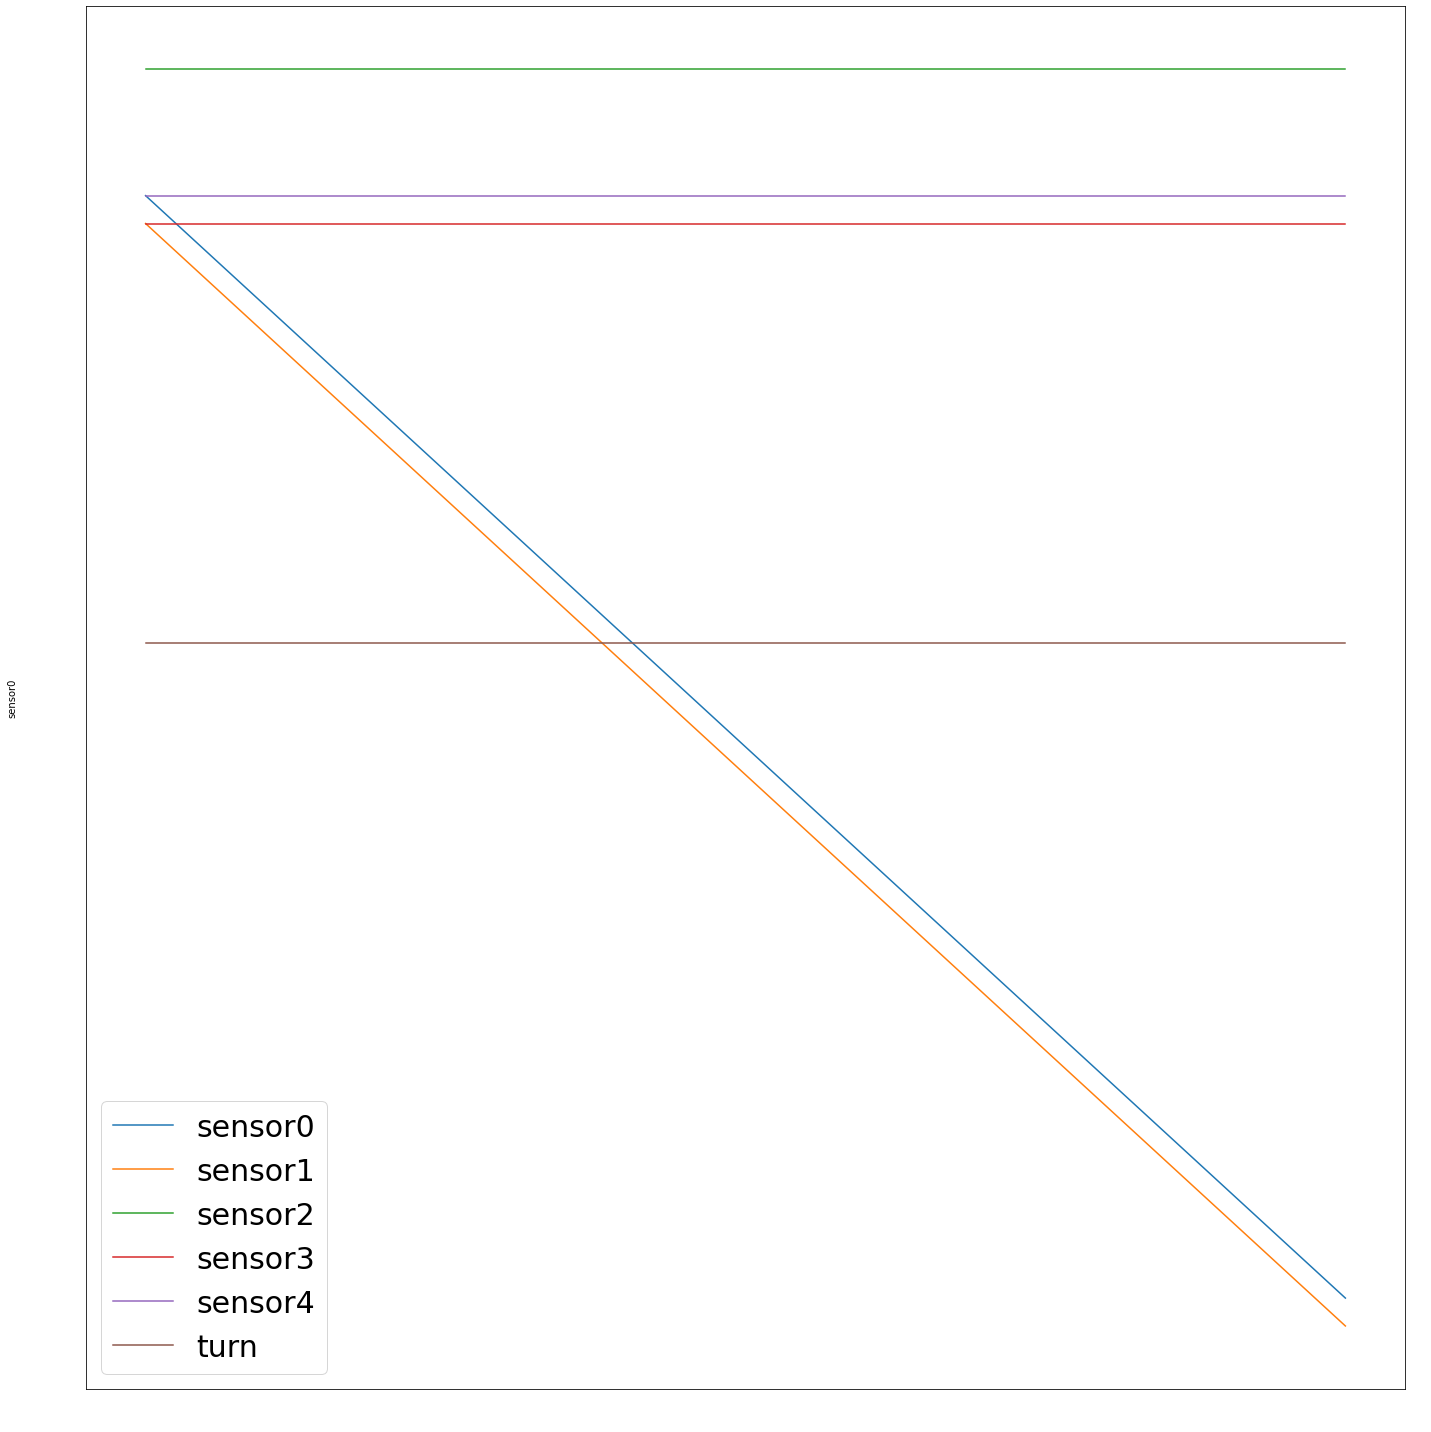

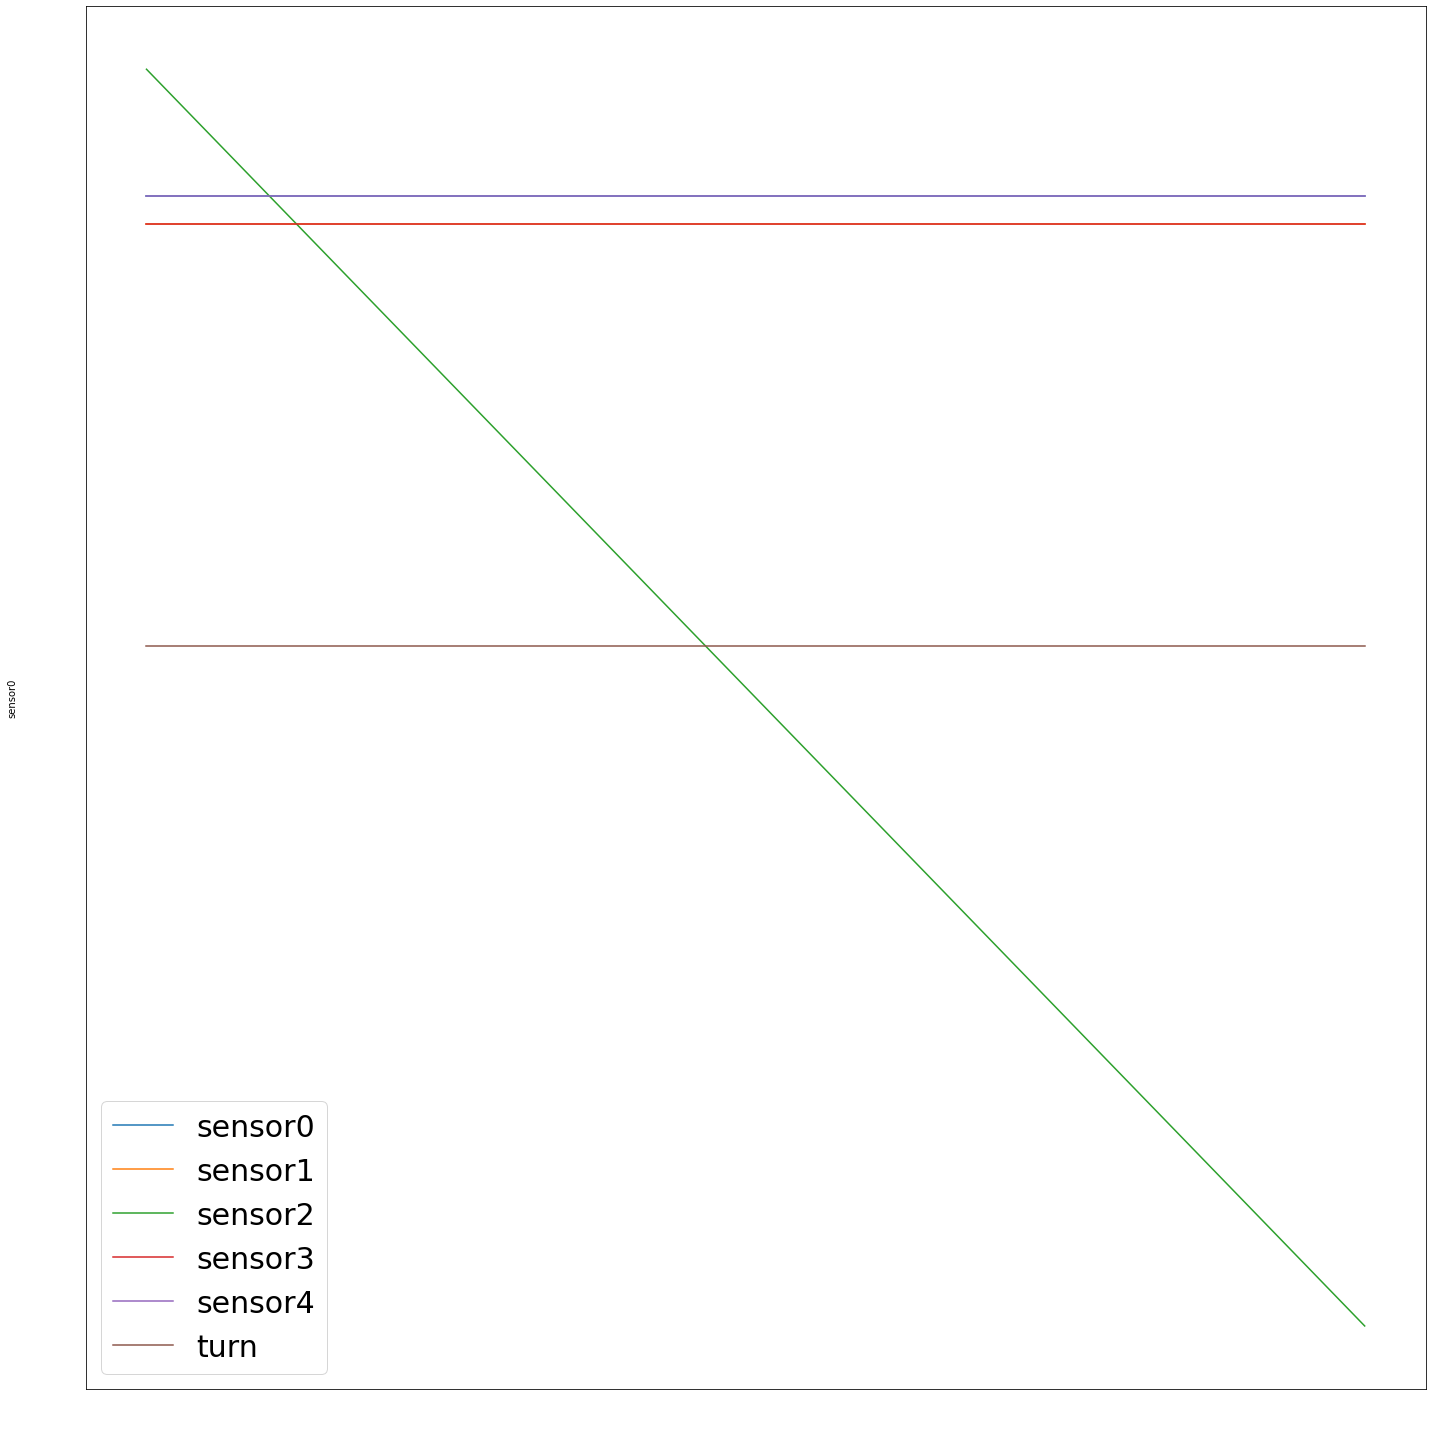

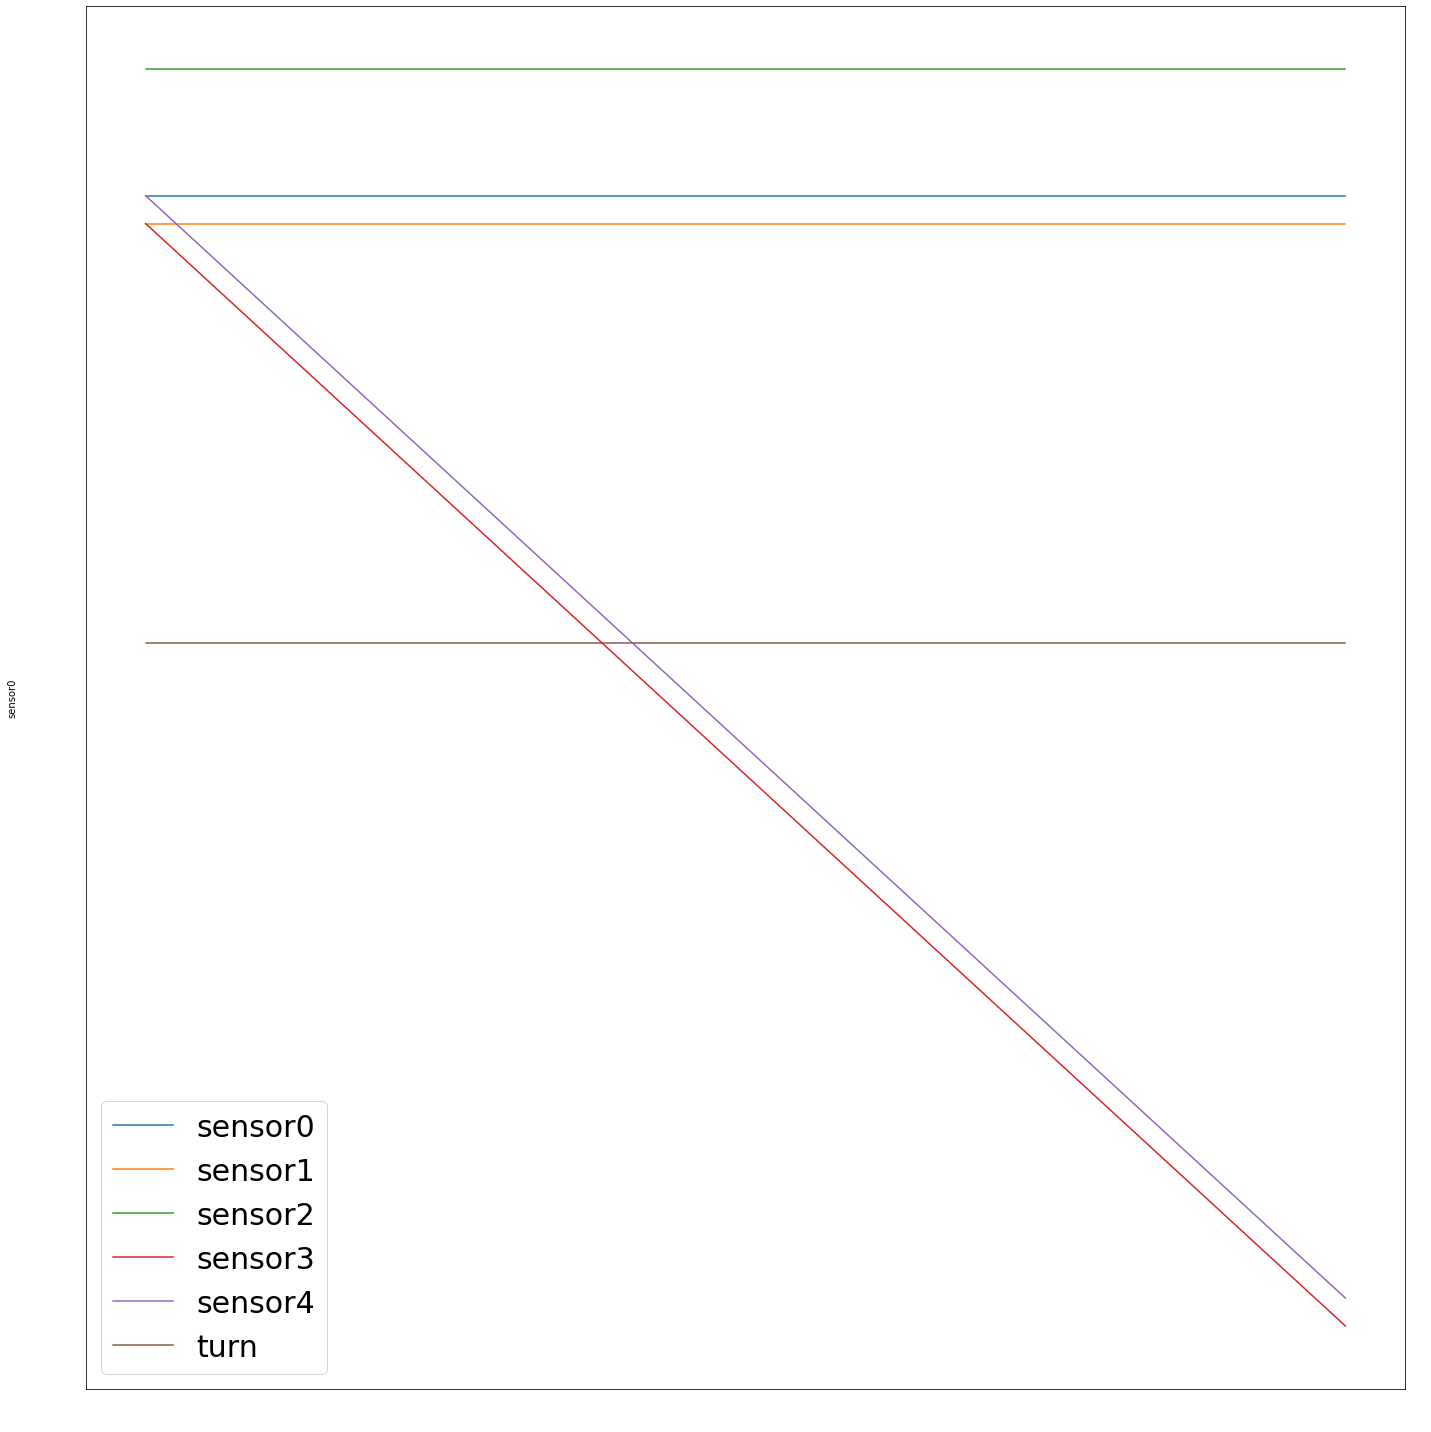

In [24]:
nn_param_choices = {
    'nb_neurons': [64, 128, 256, 512, 768, 1024],
    'nb_layers': [1, 2, 3, 4],
    'activation': ['relu', 'elu', 'tanh', 'sigmoid'],
}

config = {
    'generations': 10,
    'num_drivers': 1,
    'epochs': 10,
    'output_activation': 'tanh',
    'retain': 0.4,
    'input_shape': (5,),
    'nb_classes': 2,
    'time_limit': 10,
    'random_topology': True,
    'mutate_topology': False,
    'mutate_weights': True,
    'sensor_distances': [(70, 70), (90, 35), (110, 0), (90, -35), (70, -70)],
    'track': 'HORIZONTAL',  # SPIRAL, RANDOM, HORIZONTAL
    'network_topology_by_layer': {
        'nb_neurons': [5, 5, 1],
        'nb_layers': 3,
        'activation': ['relu', 'relu', 'softmax'],
    }
}

drivers = generate_drivers(nn_param_choices, config)

sensor_distances = [(70, 70), (90, 35), (110, 0), (90, -35), (70, -70)]
sensor_euclidean_distances = [euclidean_distance(s[0], s[1]) for s in sensor_distances]

simulate_crash_left_obstacle(drivers, sensor_euclidean_distances)
plot_driver_histories(drivers)
clear_driver_histories(drivers)

sensor_distances = [(70, 70), (90, 35), (110, 0), (90, -35), (70, -70)]
sensor_euclidean_distances = [euclidean_distance(s[0], s[1]) for s in sensor_distances]

simulate_crash_obstacle_ahead(drivers, sensor_euclidean_distances)
plot_driver_histories(drivers)
clear_driver_histories(drivers)

sensor_distances = [(70, 70), (90, 35), (110, 0), (90, -35), (70, -70)]
sensor_euclidean_distances = [euclidean_distance(s[0], s[1]) for s in sensor_distances]

simulate_crash_right_obstacle(drivers, sensor_euclidean_distances)
plot_driver_histories(drivers)
clear_driver_histories(drivers)


print(drivers[0].network)